In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
#pd.set_option('display.max_rows', None)

In [2]:
df = pd.read_csv("train.csv")

In [3]:
# Konvertiere die Spalte 'time' ins Datetime-Format
df['time'] = pd.to_datetime(df['time'], errors='coerce', utc=True)  # Fehlerhafte Werte werden zu NaT
df['time'] =df['time'].dt.tz_localize(None)

# Extrahiere die Tage (ohne Zeit)
df['date'] = df['time'].dt.date
df['date'] = pd.to_datetime(df['date'])

# Zähle die eindeutigen Tage
unique_days_count = df['date'].nunique()

print(f"Number of unique days: {unique_days_count}")

Number of unique days: 352


In [4]:
# Code for local time computation
# 
#  df = pd.read_csv("train.csv")
# df['time'] = df['time'].str.slice(0, -6)
# df['time'] = pd.to_datetime(df['time'])

# # Double timestamps
# duplicates = df[df['time'].duplicated(keep=False)]

# full_range = pd.date_range(start=df['time'].min(), end=df['time'].max(), freq='D')

# print("Double Timestamps:")
# print(duplicates)

# # Finde die doppelten Zeilen basierend auf der 'time' Spalte
# duplicates = df[df.duplicated(subset='time', keep=False)]

# # Berechne den Mittelwert der Spalten (außer 'time') für die doppelten Zeilen
# averaged_row = duplicates.mean(axis=0)

# # Erstelle eine neue DataFrame mit der gemittelten Zeile
# averaged_row['time'] = duplicates['time'].iloc[0]  # Übernehme den 'time' Wert der ersten Zeile
# averaged_df = pd.DataFrame([averaged_row])

# # Lösche die ursprünglichen doppelten Zeilen und ersetze sie durch die gemittelte Zeile
# df = pd.concat([df.drop(duplicates.index), averaged_df], ignore_index=True)

In [5]:
# df[4965:4975]

In [6]:
# row_2am = df.iloc[4969].copy()  # Kopiere die Werte der 02:00 Uhr Zeile
# row_2am['time'] = pd.to_datetime('2022-03-27 03:00:00')  # Setze den Zeitstempel auf 03:00 Uhr

# # Erstelle eine DataFrame mit der neuen Zeile
# new_row_df = pd.DataFrame([row_2am])

# # Füge die neue Zeile korrekt zwischen 02:00 und 04:00 Uhr ein
# df = pd.concat([df.iloc[:4970], new_row_df, df.iloc[4970:]]).reset_index(drop=True)

In [7]:
# df[4965:4975]

In [8]:
print(df.describe())

                      time         temp         dwpt         rhum        snow  \
count                 8424  8424.000000  8424.000000  8424.000000  119.000000   
mean   2022-02-23 08:30:00     6.435708     2.228359    77.191121   78.319328   
min    2021-08-31 21:00:00   -26.100000   -28.700000    20.000000    0.000000   
25%    2021-11-27 14:45:00     0.300000    -3.000000    66.000000   20.000000   
50%    2022-02-23 08:30:00     6.000000     1.700000    83.000000   60.000000   
75%    2022-05-22 02:15:00    12.800000     8.400000    91.000000  130.000000   
max    2022-08-17 20:00:00    31.400000    20.900000   100.000000  220.000000   
std                    NaN     9.064983     8.053260    17.482734   63.129130   

              wdir         wspd         wpgt         pres        price  \
count  8424.000000  8424.000000  8424.000000  8424.000000  8424.000000   
mean    202.886633     9.132918    20.931588  1013.128063     0.156541   
min       0.000000     0.000000     2.900000   9

In [9]:
# Display rows with missing values in the 'demand' column
missing_demand = df[df['demand'].isna()]
print(missing_demand)

                    time  temp  dwpt  rhum  snow   wdir  wspd  wpgt    pres  \
79   2021-09-04 04:00:00   6.2   4.2  87.0   NaN  290.0   7.2  16.7  1012.9   
83   2021-09-04 08:00:00  11.8   4.3  60.0   NaN  300.0  14.4  24.1  1013.9   
111  2021-09-05 12:00:00   9.4   2.5  62.0   NaN   40.0  10.8  20.4  1024.9   
180  2021-09-08 09:00:00  16.5  13.4  82.0   NaN  260.0  10.8  31.5  1015.7   
220  2021-09-10 01:00:00  14.8  13.3  91.0   NaN  240.0   3.6  11.1  1014.3   
...                  ...   ...   ...   ...   ...    ...   ...   ...     ...   
7211 2022-06-28 08:00:00  29.0  19.1  55.0   NaN  320.0   3.6  11.1  1020.3   
7386 2022-07-05 15:00:00  22.2   9.7  45.0   NaN  280.0  14.4  35.2  1014.6   
7787 2022-07-22 08:00:00  26.1  16.1  54.0   NaN  180.0   7.2  13.0  1015.9   
8166 2022-08-07 03:00:00  10.5   9.7  95.0   NaN  200.0   3.6   9.3  1019.7   
8292 2022-08-12 09:00:00  25.1  13.0  47.0   NaN  250.0  19.0  22.2  1024.0   

        price  demand       date  
79    0.10380   

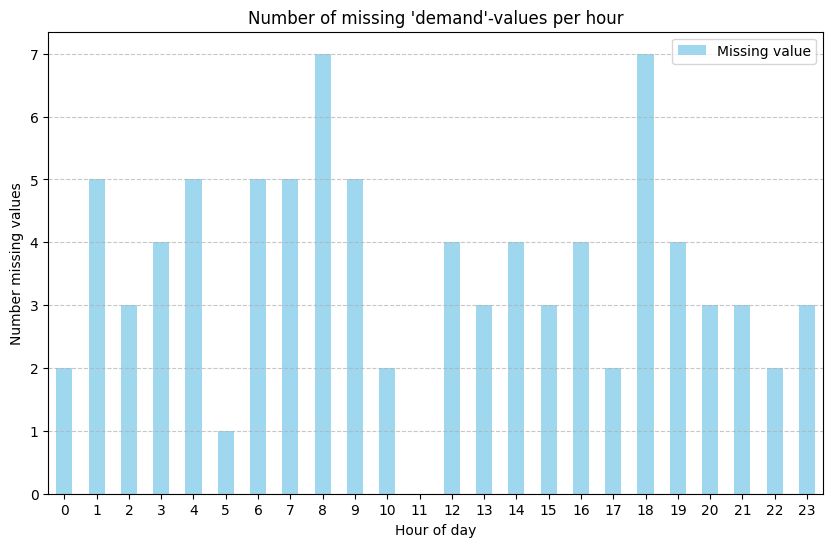

In [10]:
# Extrahiere die Stunde aus der 'time'-Spalte
df['hour'] = df['time'].dt.hour

# Filtere Zeilen mit fehlenden Werten in 'demand'
missing_demand = df[df['demand'].isna()]

# Gruppiere nach Stunden und zähle die fehlenden Werte
missing_by_hour = missing_demand.groupby('hour').size()

# Sicherstellen, dass alle 24 Stunden im Index enthalten sind
all_hours = pd.Series(0, index=range(24))  # Initialisiere mit 0 für alle Stunden
missing_by_hour = all_hours.add(missing_by_hour, fill_value=0)  # Fehlende Stunden mit 0 auffüllen

# Prozentualer Anteil der fehlenden Werte pro Stunde
missing_by_hour_percentage = (missing_by_hour / len(df)) * 100


# Visualisierung
plt.figure(figsize=(10, 6))
missing_by_hour.plot(kind='bar', color='skyblue', alpha=0.8, label='Missing value')
plt.title("Number of missing 'demand'-values per hour")
plt.xlabel("Hour of day")
plt.ylabel("Number missing values")
plt.xticks(range(24), rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.show()

In [11]:
# Ersetze NaN mit dem Mittelwert von vorherigem und nächstem Wert
df['demand'] = df['demand'].interpolate(method='linear', limit_direction='both')

# Ergebnis anzeigen
print(df)

                    time  temp  dwpt  rhum  snow   wdir  wspd  wpgt    pres  \
0    2021-08-31 21:00:00  11.2  10.3  94.0   NaN  320.0   7.2  16.7  1012.6   
1    2021-08-31 22:00:00  10.7   9.6  93.0   NaN  320.0   7.2  13.0  1012.6   
2    2021-08-31 23:00:00   9.9   9.0  94.0   NaN  320.0   7.2  13.0  1012.2   
3    2021-09-01 00:00:00  10.0   8.4  90.0   NaN  330.0   7.2  13.0  1011.9   
4    2021-09-01 01:00:00   9.0   8.1  94.0   NaN  300.0   3.6  13.0  1011.4   
...                  ...   ...   ...   ...   ...    ...   ...   ...     ...   
8419 2022-08-17 16:00:00  26.1  16.1  54.0   NaN  120.0   7.0  13.0  1015.0   
8420 2022-08-17 17:00:00  24.1  16.1  61.0   NaN  100.0   6.0  14.8  1015.0   
8421 2022-08-17 18:00:00  24.1  16.6  63.0   NaN   90.0   4.0  13.0  1015.5   
8422 2022-08-17 19:00:00  20.1  16.1  78.0   NaN  130.0   2.0  13.0  1016.0   
8423 2022-08-17 20:00:00  20.1  16.1  78.0   NaN  116.0   5.5  13.0  1016.0   

        price  demand       date  hour  
0     0.09

In [ ]:
# # Snow depth algorithm

# # Set all NaN values in the snow height to 0
# df['snow'] = df['snow'].fillna(0)
# df["hour"] = df["time"].dt.hour

# # Iterate through all days and apply the logic
# for date in df['time'].dt.date.unique():
#     # Filter the data for the current day
#     daily_data = df[df['time'].dt.date == date]
    
#     # Get the snow height at 6 AM for the current day
#     snow_6am = daily_data[daily_data['time'].dt.hour == 6]['snow']
#     if len(snow_6am) > 0:
#         snow_6am_value = daily_data[daily_data['time'].dt.hour == 6]['snow'].values[0]
#     else:
#         continue
    
#     # Get the snow height at 6 AM for the next day (if available)
#     next_day_6am_snow = df[(df['time'].dt.date == date + pd.Timedelta(days=1)) & (df['time'].dt.hour == 6)]['snow']
    
#     # If the value at 6 AM for the next day exists, calculate the difference
#     if len(next_day_6am_snow) > 0:
#         next_day_6am_snow_value = next_day_6am_snow.values[0]
#     else:
#         continue
    
#     # Calculate the snow height difference
#     snow_diff = snow_6am_value - next_day_6am_snow_value
    
#     # Check if the snow height on the next day is greater than or equal to the current day
#     if next_day_6am_snow_value >= snow_6am_value:
#         # Retain the snow height for all hours until the next day
#         for i in range(1, 24):
#             current_index = snow_6am.index[0] + i
            
#             if current_index >= len(df):  # Check if the index is valid
#                 break
            
#             if df.loc[current_index, "hour"] == 6:
#                 break
            
#             df.loc[current_index, "snow"] = snow_6am_value

#     else:
#         # Determine the hours with temperatures above 0 degrees for snow height reduction
#         num_hours_above_0 = 0
#         for i in range(1, 24):
#             current_index = snow_6am.index[0] + i
#             if current_index >= len(df):  # Check if the index is valid
#                 break
            
#             if df.loc[current_index, "hour"] == 6:
#                 break
            
#             if df.loc[snow_6am.index[0] + i, "temp"] > 0:
#                 num_hours_above_0 += 1
        
#         # Calculate the hourly snow height reduction (in mm per hour)
#         if num_hours_above_0 > 0:
#             snow_decrease_per_hour = snow_diff / num_hours_above_0
        
#         for i in range(1, 24):
#             current_index = snow_6am.index[0] + i
#             if current_index >= len(df):  # Check if the index is valid
#                 break
#             if df.loc[current_index, "hour"] == 6:
#                 break
#             if df.loc[snow_6am.index[0] + i, "temp"] > 0:
#                 df.loc[snow_6am.index[0] + i, "snow"] = df.loc[snow_6am.index[0] + i - 1, "snow"] - snow_decrease_per_hour
#             else:
#                 df.loc[snow_6am.index[0] + i, "snow"] = df.loc[snow_6am.index[0] + i - 1, "snow"]

# print(df)

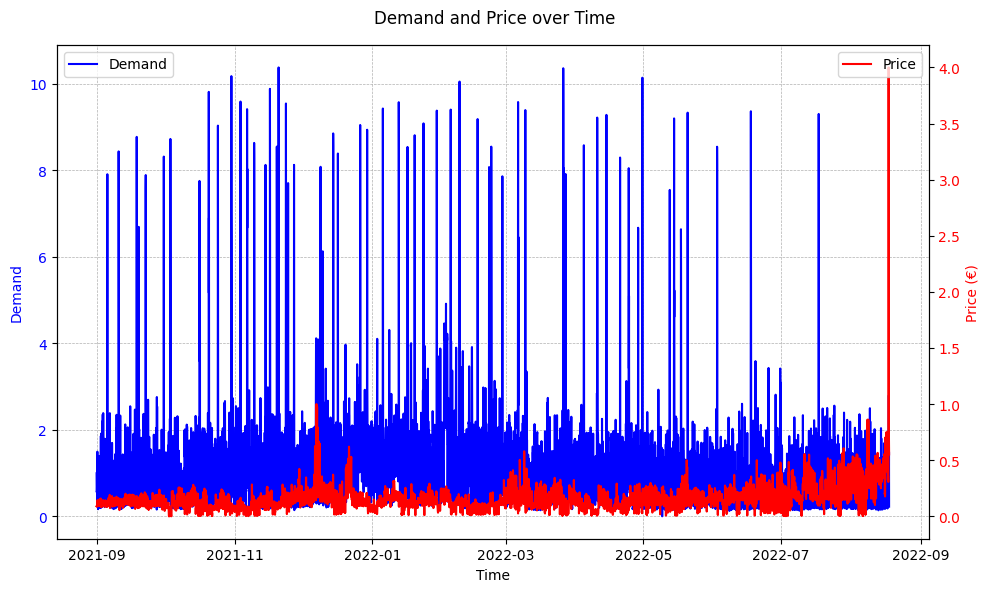

In [12]:
# Plot erstellen
fig, ax1 = plt.subplots(figsize=(10, 6))

# Linke Achse: Demand
ax1.plot(df['time'], df['demand'], color='blue', label='Demand', linestyle='-')
ax1.set_xlabel('Time')
ax1.set_ylabel('Demand', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.grid(True, which='both', linestyle='--', linewidth=0.5)

# Rechte Achse: Price
ax2 = ax1.twinx()
ax2.plot(df['time'], df['price'], color='red', label='Price', linestyle='-')
ax2.set_ylabel('Price (€)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Titel und Legenden
fig.suptitle('Demand and Price over Time')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.xticks(rotation=45)  # Zeitachse rotieren, wenn nötig
plt.tight_layout()  # Um Überlappungen zu vermeiden
plt.show()

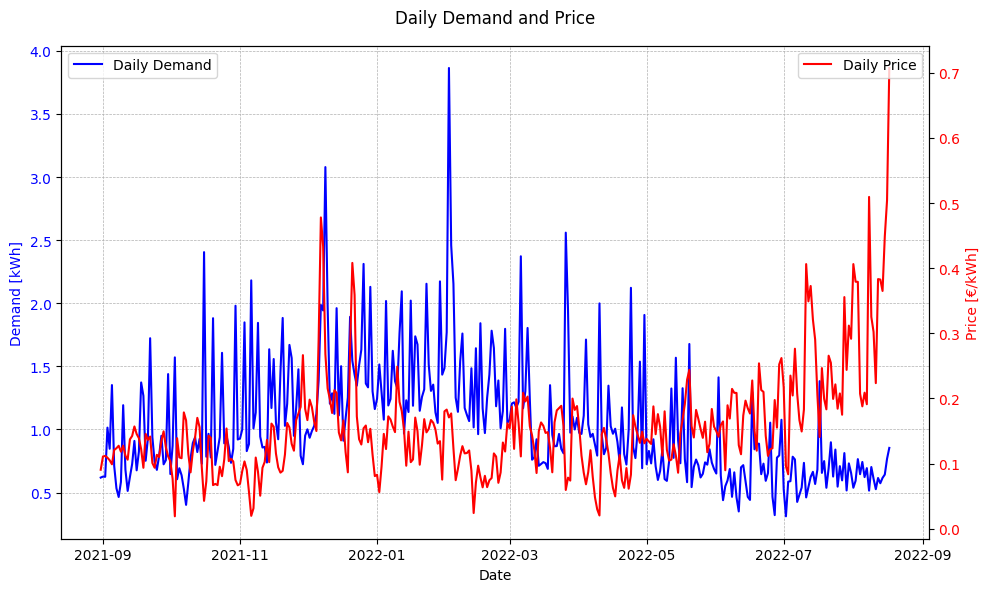

In [13]:
# Resample to daily frequency, aggregating by mean
daily_data = df.resample('D', on='time').mean()

# Plot daily aggregated data
fig, ax1 = plt.subplots(figsize=(10, 6))

# Left axis: Daily Demand
ax1.plot(daily_data.index, daily_data['demand'], color='blue', label='Daily Demand', linestyle='-')
ax1.set_xlabel('Date')
ax1.set_ylabel('Demand [kWh]', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.grid(True, which='both', linestyle='--', linewidth=0.5)

# Right axis: Daily Price
ax2 = ax1.twinx()
ax2.plot(daily_data.index, daily_data['price'], color='red', label='Daily Price', linestyle='-')
ax2.set_ylabel('Price [€/kWh]', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Title and legends
fig.suptitle('Daily Demand and Price')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.xticks(rotation=45)  # Rotate date labels if necessary
plt.tight_layout()  # Avoid overlaps
plt.show()

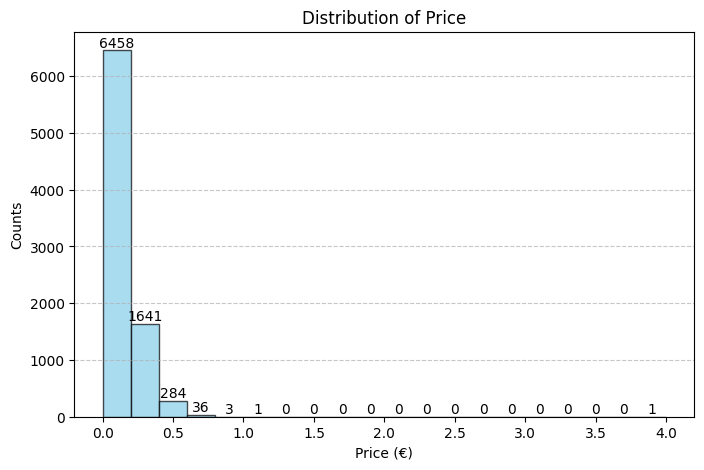

In [14]:
# Histogramm erstellen
plt.figure(figsize=(8, 5))
counts, bins, bars = plt.hist(df['price'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)

# Absolute Werte über die Balken schreiben
for count, x in zip(counts, bins[:-1]):
    plt.text(x + (bins[1] - bins[0]) / 2, count, str(int(count)), ha='center', va='bottom', fontsize=10)

# Diagramm anpassen
plt.title('Distribution of Price')
plt.xlabel('Price (€)')
plt.ylabel('Counts')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [15]:
# Zeilen filtern, bei denen Price > 3.5
filtered_df = df[df['price'] > 3.5]

# Ergebnis anzeigen
print(filtered_df)

                    time  temp  dwpt  rhum  snow   wdir  wspd  wpgt    pres  \
8418 2022-08-17 15:00:00  28.1  15.1  45.0   NaN  140.0   9.0  18.5  1015.0   

      price  demand       date  hour  
8418    4.0   0.528 2022-08-17    15  


In [16]:
df.loc[8418, "price"] = 0.75008

In [17]:
df.iloc[8410:8420]

,time,temp,dwpt,rhum,snow,wdir,wspd,wpgt,pres,price,demand,date,hour
8410,2022-08-17 07:00:00,25.1,19.0,69.0,NaN,130.0,13.0,14.8,1016.0,0.32498,1.375,2022-08-17,7
8411,2022-08-17 08:00:00,27.1,18.1,58.0,NaN,130.0,13.0,16.7,1016.0,0.35135,0.779,2022-08-17,8
8412,2022-08-17 09:00:00,29.1,16.0,45.0,NaN,130.0,13.0,18.5,1016.0,0.35998,0.605,2022-08-17,9
8413,2022-08-17 10:00:00,29.1,16.0,45.0,NaN,140.0,15.0,20.4,1016.0,0.32498,0.570,2022-08-17,10
8414,2022-08-17 11:00:00,30.1,15.0,40.0,NaN,120.0,13.0,20.4,1015.0,0.31496,0.807,2022-08-17,11
8415,2022-08-17 12:00:00,29.1,15.3,43.0,NaN,100.0,11.0,20.4,1015.6,0.30572,1.272,2022-08-17,12
8416,2022-08-17 13:00:00,30.1,16.2,43.0,NaN,120.0,11.0,20.4,1015.0,0.75000,1.093,2022-08-17,13
8417,2022-08-17 14:00:00,28.1,16.1,48.0,NaN,140.0,11.0,18.5,1015.0,0.75008,1.702,2022-08-17,14
8418,2022-08-17 15:00:00,28.1,15.1,45.0,NaN,140.0,9.0,18.5,1015.0,0.75008,0.528,2022-08-17,15
8419,2022-08-17 16:00:00,26.1,16.1,54.0,NaN,120.0,7.0,13.0,1015.0,0.75008,0.897,2022-08-17,16


In [18]:
df.drop('snow', axis=1, inplace=True)

In [19]:
df["temp_wc"] = 13.12 + 0.6215 * df["temp"] - 11.37 * (df["wspd"] ** 0.16) + 0.3965 * df["temp"] * (df["wspd"] ** 0.16)
df["adjHum"] = df["temp"] * df["rhum"]

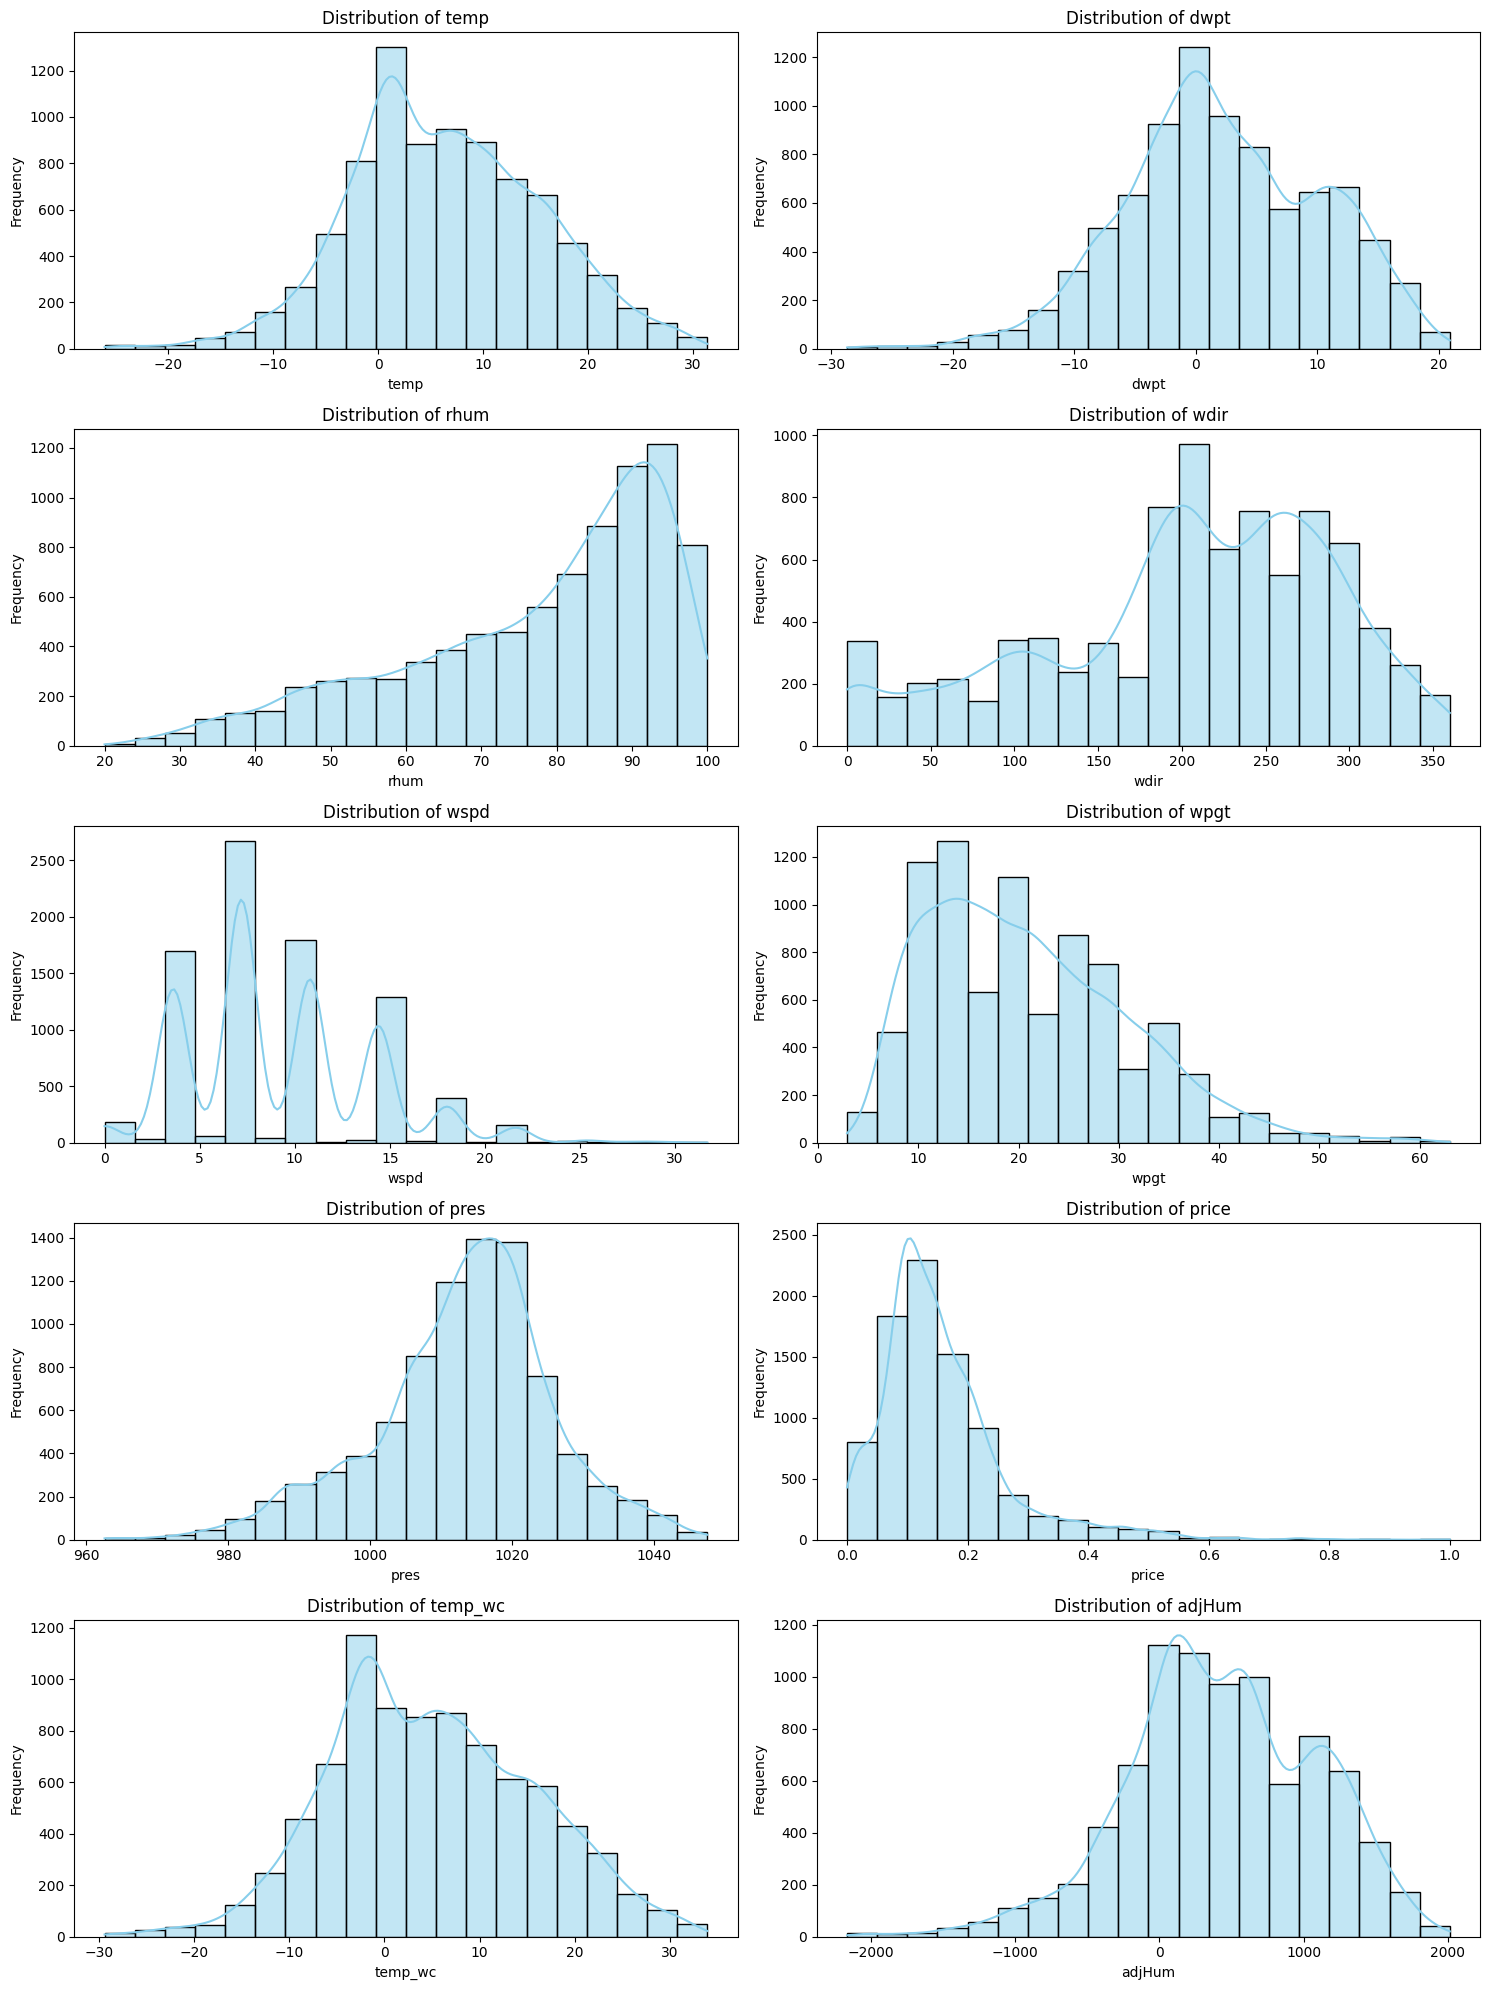

In [20]:
variables = ['temp', 'dwpt', 'rhum', 'wdir', 'wspd', 'wpgt', 'pres', 'price', 'temp_wc', 'adjHum']

plt.figure(figsize=(15, 20))
for i, var in enumerate(variables, 1):
    plt.subplot(5, 2, i)
    sns.histplot(df[var], kde=True, bins=20, color='skyblue')
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


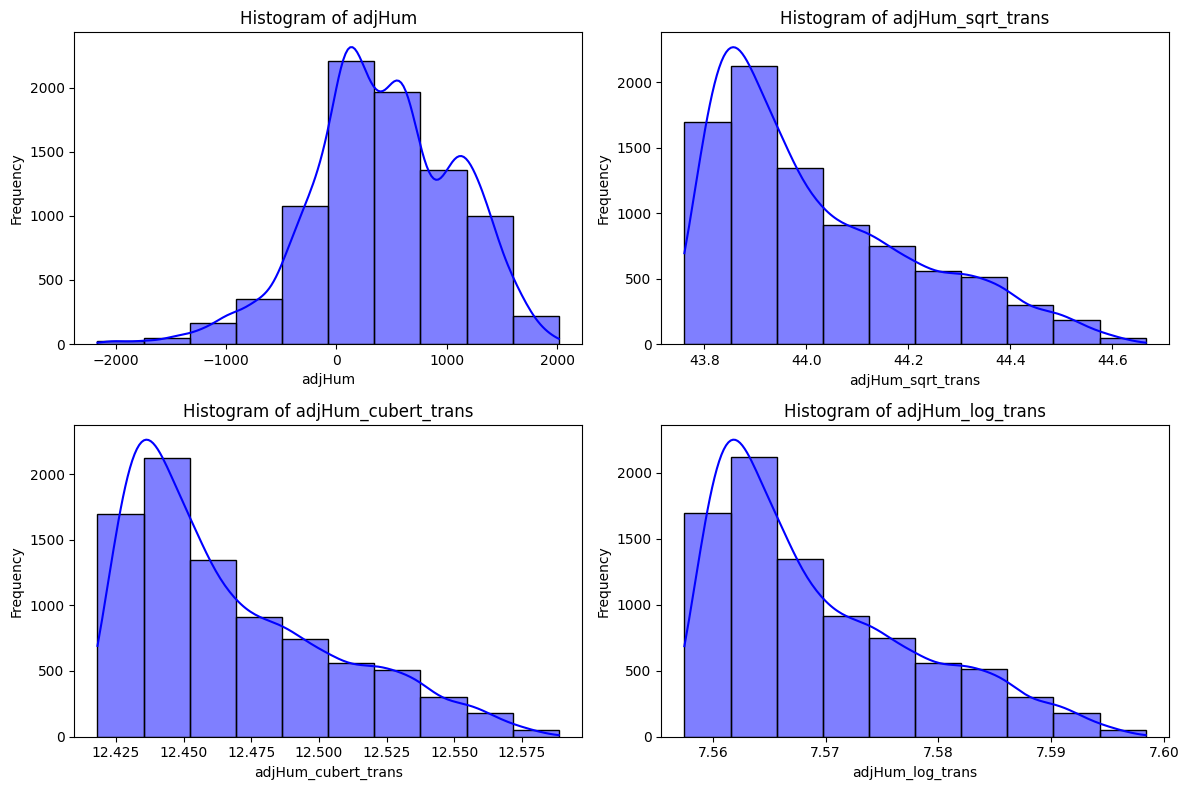

In [21]:
const = df['adjHum'].max() + 1

# Apply transformations
df['adjHum_sqrt_trans'] = np.sqrt(const - df['rhum'])
df['adjHum_cubert_trans'] = np.cbrt(const - df['rhum'])
df['adjHum_log_trans'] = np.log(const - df['rhum'])

# Visualize the transformations
transformations = ['adjHum', 'adjHum_sqrt_trans', 'adjHum_cubert_trans', 'adjHum_log_trans']
plt.figure(figsize=(12, 8))

for i, col in enumerate(transformations, start=1):
    plt.subplot(2, 2, i)
    sns.histplot(df[col], kde=True, bins=10, color='blue')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

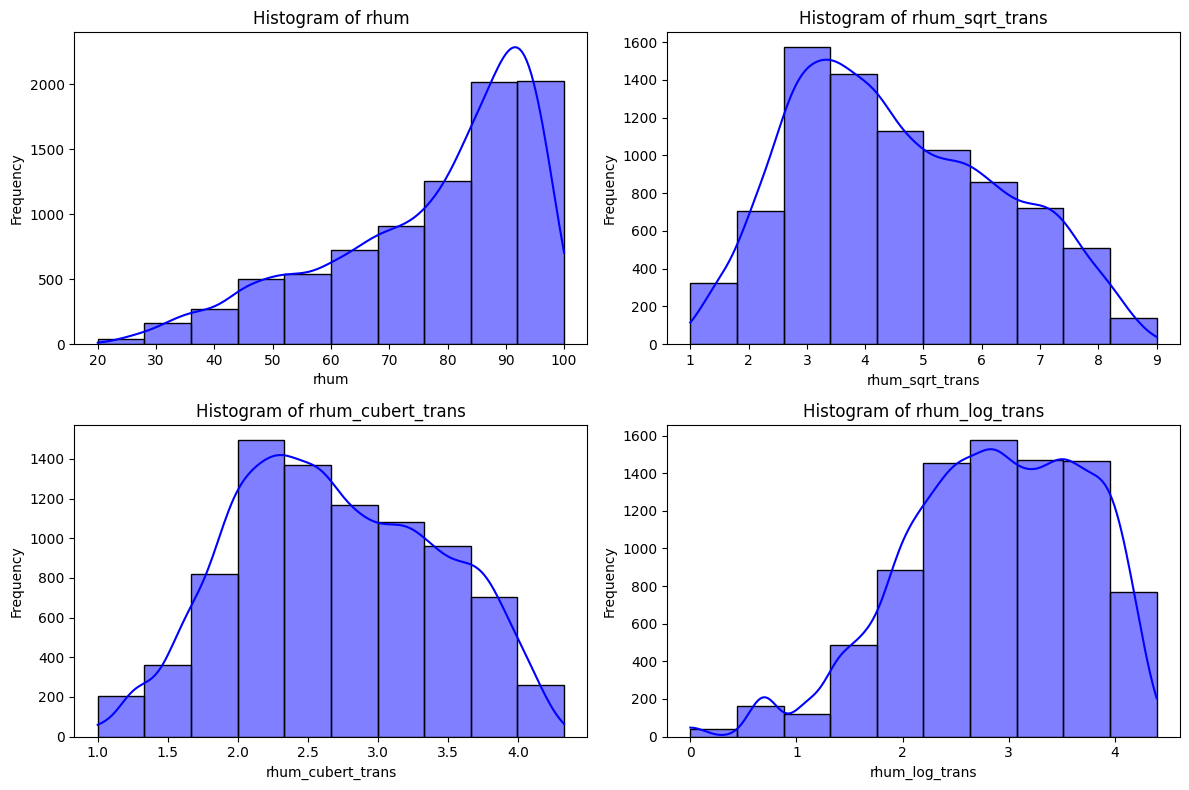

In [22]:
const = df['rhum'].max() + 1

# Apply transformations
df['rhum_sqrt_trans'] = np.sqrt(const - df['rhum'])
df['rhum_cubert_trans'] = np.cbrt(const - df['rhum'])
df['rhum_log_trans'] = np.log(const - df['rhum'])

# Visualize the transformations
transformations = ['rhum', 'rhum_sqrt_trans', 'rhum_cubert_trans', 'rhum_log_trans']
plt.figure(figsize=(12, 8))

for i, col in enumerate(transformations, start=1):
    plt.subplot(2, 2, i)
    sns.histplot(df[col], kde=True, bins=10, color='blue')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [23]:
df.drop('rhum_sqrt_trans', axis=1, inplace=True)
df.drop('rhum_log_trans', axis=1, inplace=True)
df.rename(columns={"rhum_cubert_trans": "rhum_transformed"}, inplace=True)


/anaconda/envs/azureml_py38_PT_TF/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


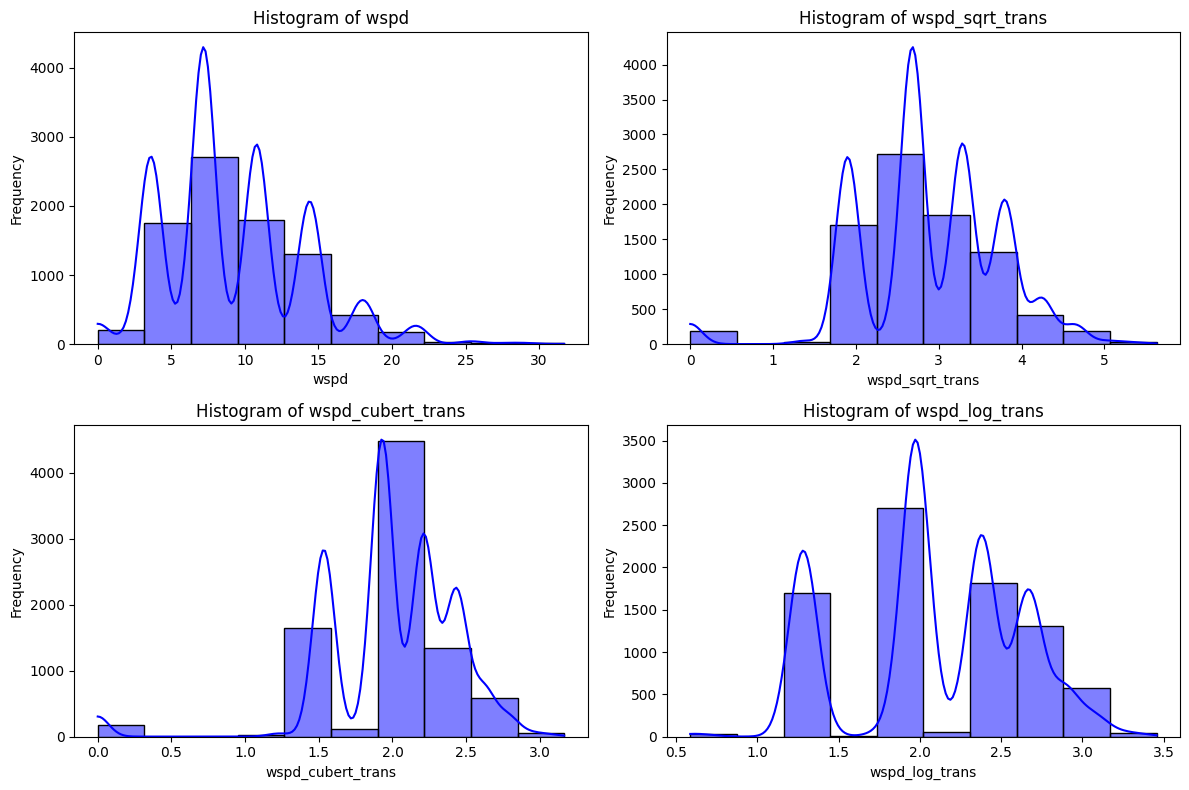

In [24]:
# Apply transformations
df['wspd_sqrt_trans'] = np.sqrt(df['wspd'])
df['wspd_cubert_trans'] = np.cbrt(df['wspd'])
df['wspd_log_trans'] = np.log(df['wspd'])

# Visualize the transformations
transformations = ['wspd', 'wspd_sqrt_trans', 'wspd_cubert_trans', 'wspd_log_trans']
plt.figure(figsize=(12, 8))

for i, col in enumerate(transformations, start=1):
    plt.subplot(2, 2, i)
    sns.histplot(df[col], kde=True, bins=10, color='blue')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [25]:
df.drop('wspd_sqrt_trans', axis=1, inplace=True)
df.drop('wspd_cubert_trans', axis=1, inplace=True)
df.drop('wspd_log_trans', axis=1, inplace=True)

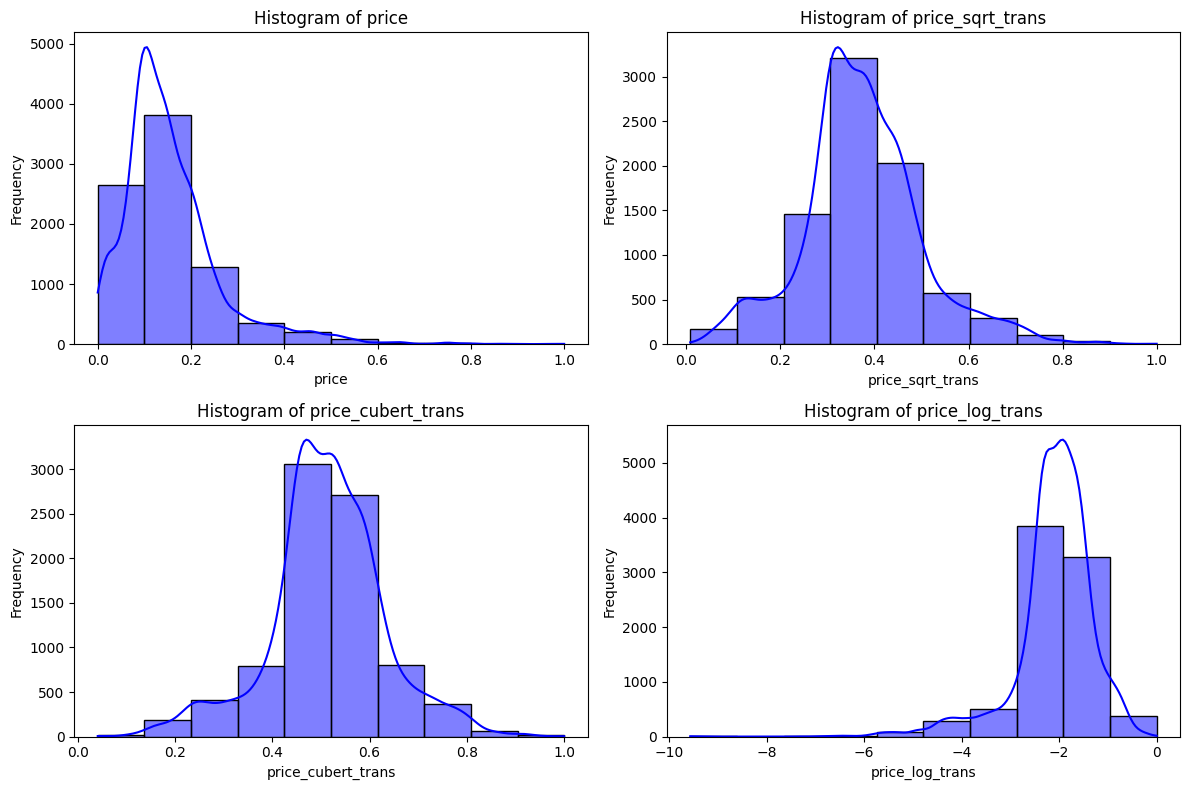

In [26]:
# Apply transformations
df['price_sqrt_trans'] = np.sqrt(df['price'])
df['price_cubert_trans'] = np.cbrt(df['price'])
df['price_log_trans'] = np.log(df['price'])

# Visualize the transformations
transformations = ['price', 'price_sqrt_trans', 'price_cubert_trans', 'price_log_trans']
plt.figure(figsize=(12, 8))

for i, col in enumerate(transformations, start=1):
    plt.subplot(2, 2, i)
    sns.histplot(df[col], kde=True, bins=10, color='blue')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [27]:
df.drop('price_sqrt_trans', axis=1, inplace=True)
df.drop('price_log_trans', axis=1, inplace=True)
df.rename(columns={"price_cubert_trans": "price_transformed"}, inplace=True)

In [28]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt

# Assuming the 'df' DataFrame contains the dataset and 'demand' is the target variable
# If your 'time' column is not set as datetime, do so:
df['time'] = pd.to_datetime(df['time'])

# Check if the 'demand' series is stationary using the Augmented Dickey-Fuller (ADF) test
def adf_test(series):
    result = adfuller(series, autolag='AIC')
    print(f"ADF Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    if result[1] <= 0.05:
        print("The series is stationary.")
    else:
        print("The series is non-stationary. Differencing may be required.")

# Perform ADF test on the demand series
adf_test(df['demand'])

# If the series is non-stationary (p-value > 0.05), apply differencing
if adfuller(df['demand'])[1] > 0.05:
    # Apply first differencing to make the series stationary
    df['demand_diff'] = df['demand'].diff().dropna()

    # Check stationarity of the differenced series
    adf_test(df['demand_diff'])

    # Plot the original and differenced demand series
    plt.figure(figsize=(10, 6))
    plt.subplot(211)
    plt.plot(df['demand'], label='Original Demand')
    plt.title('Original Demand Series')
    plt.subplot(212)
    plt.plot(df['demand_diff'], label='Differenced Demand', color='orange')
    plt.title('Differenced Demand Series')
    plt.tight_layout()
    plt.show()
else:
    print("The series is already stationary, no differencing applied.")


ADF Statistic: -11.350419858178673
p-value: 1.0027014025482286e-20
The series is stationary.
The series is already stationary, no differencing applied.


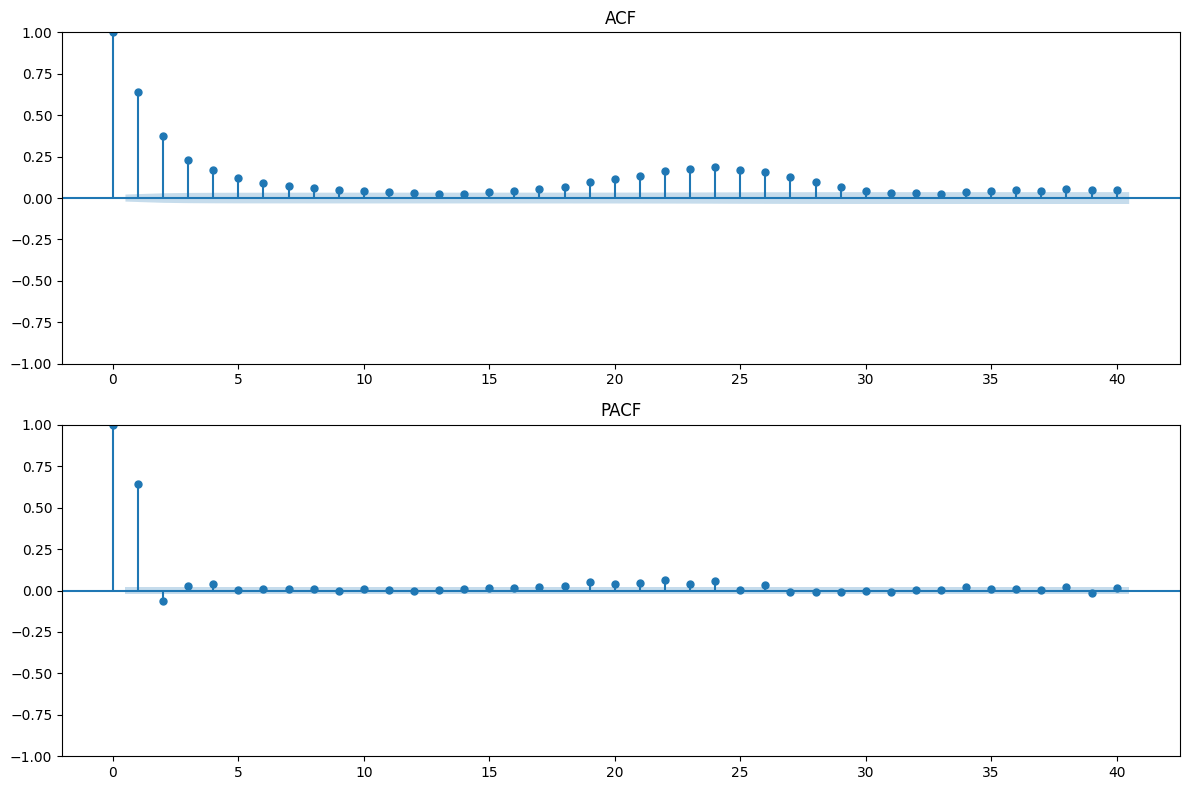

In [29]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# Plot ACF and PACF
fig, ax = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(df["demand"], ax=ax[0])
plot_pacf(df["demand"], ax=ax[1])
ax[0].set_title("ACF")
ax[1].set_title("PACF")
plt.tight_layout()
plt.show()

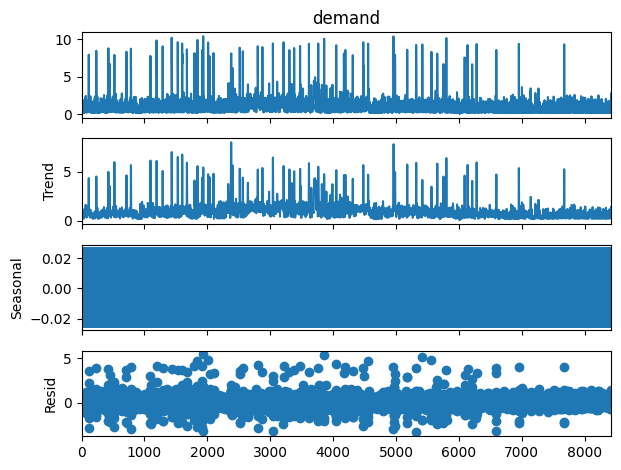

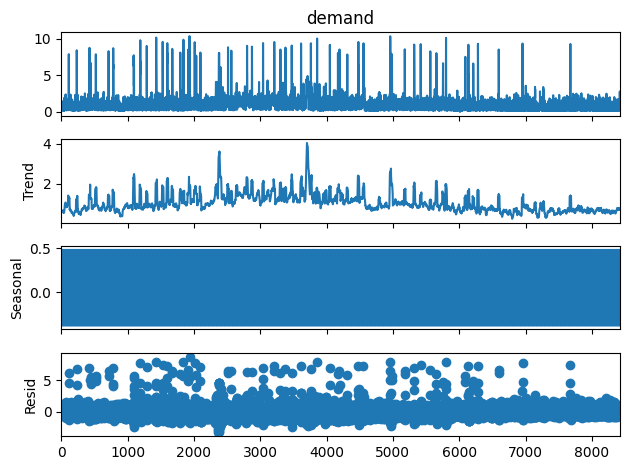

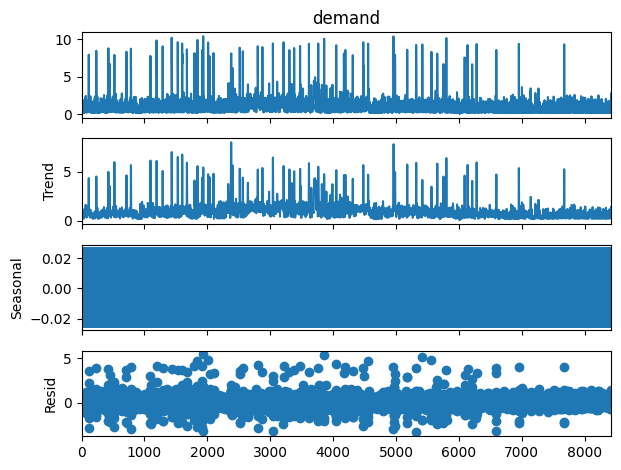

In [30]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df['demand'], model='additive', period=24)  # period=24 für tägliche Periodizität
result.plot()
result = seasonal_decompose(df['demand'], model='additive', period=4)  # period=24 für tägliche Periodizität
result.plot()


In [31]:
import pmdarima as pm
auto_arima = pm.auto_arima(df['demand'], stepwise=False, seasonal=False)
auto_arima

/anaconda/envs/azureml_py38_PT_TF/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/anaconda/envs/azureml_py38_PT_TF/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/anaconda/envs/azureml_py38_PT_TF/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/anaconda/envs/azureml_py38_PT_TF/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/anaconda/envs/azureml_py38_PT_TF/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finit

ARIMA(order=(0, 1, 2), scoring_args={}, suppress_warnings=True)

In [32]:
import pmdarima as pm
auto_arima = pm.auto_arima(df['demand'], stepwise=True, seasonal=False)
auto_arima

/anaconda/envs/azureml_py38_PT_TF/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/anaconda/envs/azureml_py38_PT_TF/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/anaconda/envs/azureml_py38_PT_TF/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/anaconda/envs/azureml_py38_PT_TF/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/anaconda/envs/azureml_py38_PT_TF/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finit

ARIMA(order=(0, 1, 2), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [33]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error

# Step 1: Load Data
demand = df['demand']

# Step 3: Split Data into Train and Test
train_size = int(len(demand) * 0.8)  # 80% training, 20% testing
train, test = demand[:train_size], demand[train_size:]

# Step 5: Fit ARMA Model
# Define order based on ACF and PACF
p, d, q = 2, 1, 0  # Example order, adjust based on analysis
#model = ARIMA(train, order=(p, 0, q))  # Note: If differencing was needed, use (p, d, q)

model_sarimax = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 0, 24))
model_fit_sarimax = model_sarimax.fit(disp=False)

model_arima = ARIMA(train, order=(1, 1, 0))
model_fit_arima = model_arima.fit()

# Summary of the model
print(model_fit_sarimax.summary())

# Step 6: Predictions on Test Data
predictions_sarimax = model_fit_sarimax.forecast(steps=len(test))
predictions_arima = model_fit_arima.forecast(steps=len(test))

/anaconda/envs/azureml_py38_PT_TF/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                                      SARIMAX Results                                      
Dep. Variable:                              demand   No. Observations:                 6739
Model:             SARIMAX(1, 1, 1)x(1, 1, [], 24)   Log Likelihood               -9940.265
Date:                             Thu, 19 Dec 2024   AIC                          19888.531
Time:                                     11:48:10   BIC                          19915.778
Sample:                                          0   HQIC                         19897.939
                                            - 6739                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6088      0.005    119.328      0.000       0.599       0.619
ma.L1         -1.0000      

In [34]:
# Step 7: Evaluate Performance
mae_sarimax = mean_absolute_error(test, predictions_sarimax)
mae_arima = mean_absolute_error(test, predictions_arima)
print(f"Mean Absolute Error (MAE) Sarimax: {mae_sarimax}")
print(f"Mean Absolute Error (MAE) Arima: {mae_arima}")

Mean Absolute Error (MAE) Sarimax: 0.4712803592969569
Mean Absolute Error (MAE) Arima: 0.4116539277449424


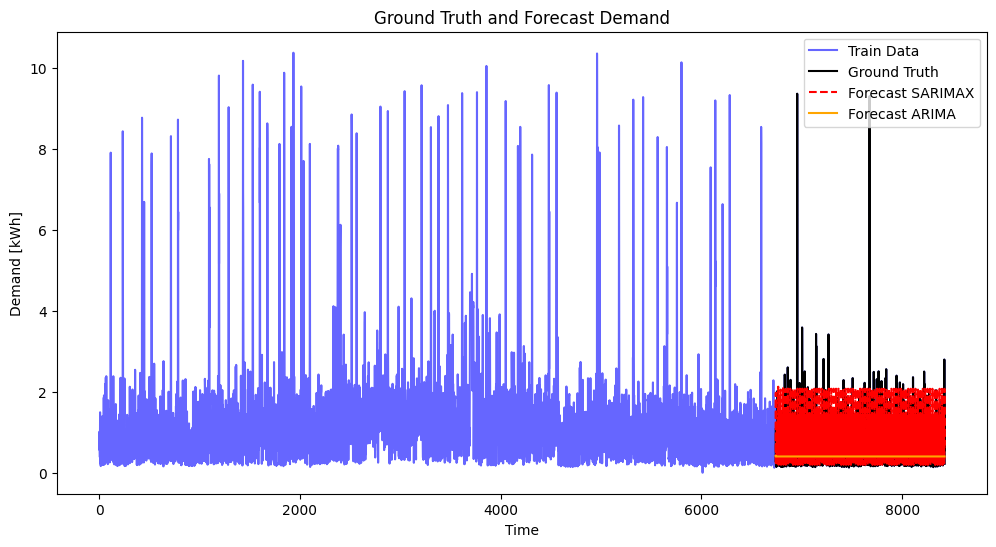

In [35]:
# Step 9: Plot the Real Data vs Predictions
plt.figure(figsize=(12, 6))
plt.plot(demand, label='Train Data', color='blue', alpha=0.6)
plt.plot(range(train_size, len(demand)), test, label='Ground Truth', color='black', linestyle='-')
plt.plot(range(train_size, len(demand)), predictions_sarimax, label='Forecast SARIMAX', color='red', linestyle='--')
plt.plot(range(train_size, len(demand)), predictions_arima, label='Forecast ARIMA', color='orange', linestyle='-')
plt.title('Ground Truth and Forecast Demand')
plt.xlabel('Time')
plt.ylabel('Demand [kWh]')
plt.legend()
plt.show()

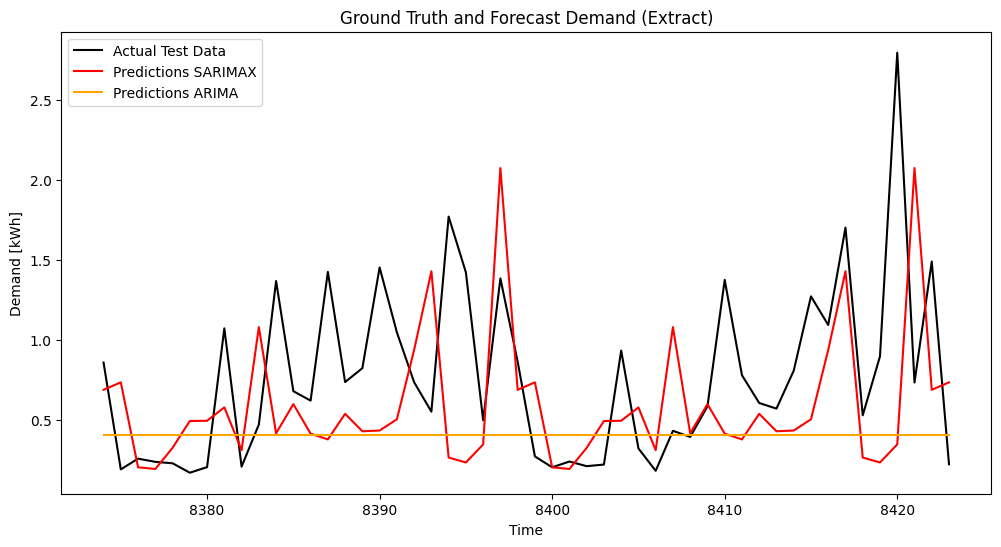

In [36]:
# Step 9: Plot the Real Data vs Predictions
plt.figure(figsize=(12, 6))
#plt.plot(demand, label='Real Data', color='blue', alpha=0.6)
plt.plot(range(len(demand)-50, len(demand)), test[-50:], label='Actual Test Data', color='black', linestyle='-')
plt.plot(range(len(demand)-50, len(demand)), predictions_sarimax[-50:], label='Predictions SARIMAX', color='red', linestyle='-')
plt.plot(range(len(demand)-50, len(demand)), predictions_arima[-50:], label='Predictions ARIMA', color='orange', linestyle='-')
plt.title('Ground Truth and Forecast Demand (Extract)')
plt.xlabel('Time')
plt.ylabel('Demand [kWh]')
plt.legend()
plt.show()

In [37]:
df['hour'] = df['time'].dt.hour
df['weekday'] = df['time'].dt.weekday  # 0=Monday, 6=Sunday
df['month'] = df['time'].dt.month  # 1=January, 12=December
df

,time,temp,dwpt,rhum,wdir,wspd,wpgt,pres,price,demand,...,hour,temp_wc,adjHum,adjHum_sqrt_trans,adjHum_cubert_trans,adjHum_log_trans,rhum_transformed,price_transformed,weekday,month
0,2021-08-31 21:00:00,11.2,10.3,94.0,320.0,7.2,16.7,1012.6,0.09016,0.577,...,21,10.577897,1052.8,43.829214,12.431087,7.560601,1.912931,0.448406,1,8
1,2021-08-31 22:00:00,10.7,9.6,93.0,320.0,7.2,13.0,1012.6,0.09251,0.594,...,22,9.995261,995.1,43.840620,12.433244,7.561122,2.000000,0.452268,1,8
2,2021-08-31 23:00:00,9.9,9.0,94.0,320.0,7.2,13.0,1012.2,0.08890,0.685,...,23,9.063044,930.6,43.829214,12.431087,7.560601,1.912931,0.446307,1,8
3,2021-09-01 00:00:00,10.0,8.4,90.0,330.0,7.2,13.0,1011.9,0.08735,1.016,...,0,9.179571,900.0,43.874822,12.439710,7.562681,2.223980,0.443698,2,9
4,2021-09-01 01:00:00,9.0,8.1,94.0,300.0,3.6,13.0,1011.4,0.08688,0.677,...,1,9.137448,846.0,43.829214,12.431087,7.560601,1.912931,0.442901,2,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8419,2022-08-17 16:00:00,26.1,16.1,54.0,120.0,7.0,13.0,1015.0,0.75008,0.897,...,16,27.946741,1409.4,44.283180,12.516777,7.581210,3.608826,0.908593,2,8
8420,2022-08-17 17:00:00,24.1,16.1,61.0,100.0,6.0,14.8,1015.0,0.75005,2.796,...,17,25.681436,1470.1,44.204072,12.501866,7.577634,3.419952,0.908580,2,8
8421,2022-08-17 18:00:00,24.1,16.6,63.0,90.0,4.0,13.0,1015.5,0.74888,0.733,...,18,25.833241,1518.3,44.181444,12.497600,7.576610,3.361975,0.908108,2,8
8422,2022-08-17 19:00:00,20.1,16.1,78.0,130.0,2.0,13.0,1016.0,0.62909,1.490,...,19,21.812983,1567.8,44.011362,12.465505,7.568896,2.843867,0.856849,2,8


In [38]:
# Load your dataset
data = df.copy()

# Target variable and features
target = 'demand'
exogenous_features = ['temp', 'price', 'rhum', 'wspd', 'pres', 'weekday', 'hour', 'month', 'temp_wc', 'adjHum']  # Modify based on correlation

# Check correlation to select top 6 features
correlations = data[exogenous_features].corrwith(data[target]).abs().sort_values(ascending=False)
selected_features = correlations.head(9).index.tolist()
print(f"Selected features: {selected_features}")

Selected features: ['adjHum', 'temp_wc', 'temp', 'price', 'rhum', 'pres', 'hour', 'month', 'wspd']


Selected features: ['adjHum', 'temp_wc', 'temp', 'price', 'rhum', 'pres', 'hour', 'month', 'wspd']


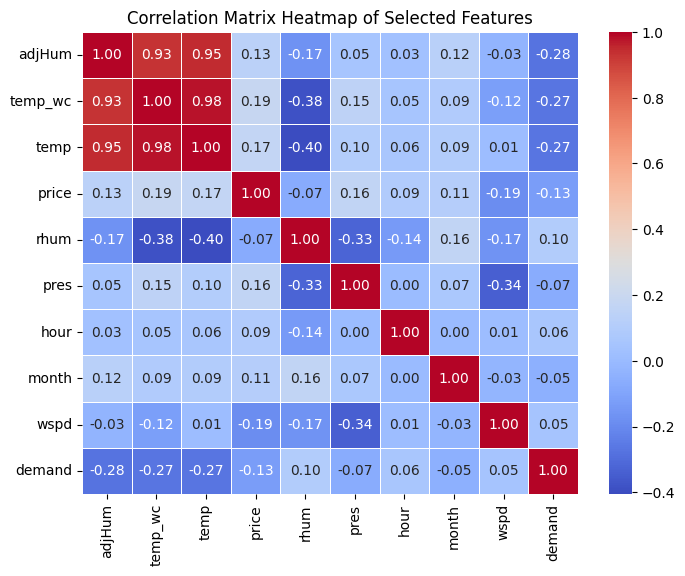

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and it is already loaded
data = df.copy()

# Target variable and features
target = 'demand'
exogenous_features = ['temp', 'price', 'rhum', 'wspd', 'pres', 'weekday', 'hour', 'month', 'temp_wc', 'adjHum']

# Check correlation to select top features based on correlation with the target variable
correlations = data[exogenous_features].corrwith(data[target]).abs().sort_values(ascending=False)
selected_features = correlations.head(9).index.tolist()

# Print the selected features
print(f"Selected features: {selected_features}")
selected_features.append('demand')
# Calculate the correlation matrix for the selected features
correlation_matrix = data[selected_features].corr()

# Set up the heatmap
plt.figure(figsize=(8, 6))  # Adjust size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Title and show plot
plt.title('Correlation Matrix Heatmap of Selected Features')
plt.show()

Selected features: ['price']
ARIMAX Model MAE: 0.62
ARIMA Model MAE: 0.41


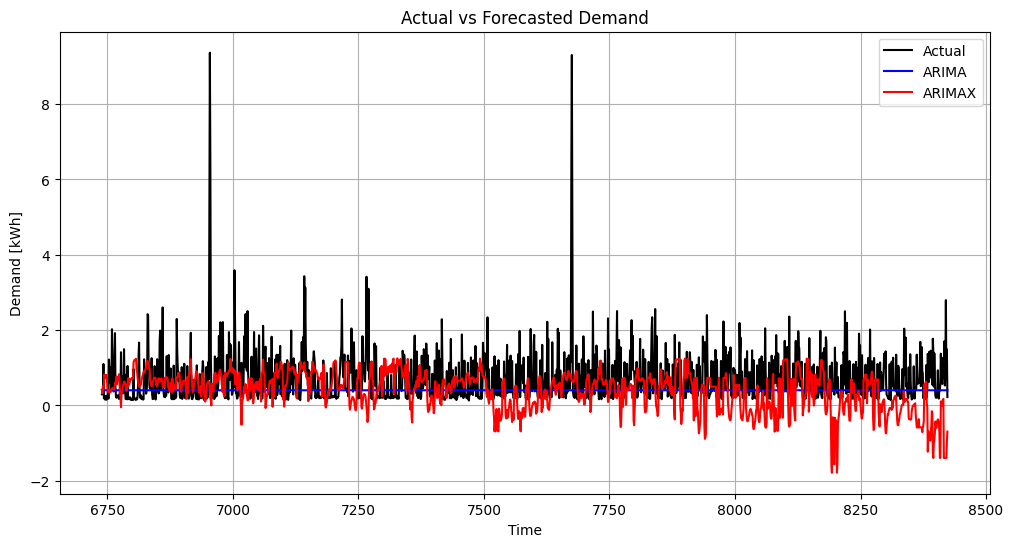

ARIMA performs better with MAE 0.41 compared to ARIMAX 0.62.
This suggests that exogenous inputs did not significantly contribute to forecasting accuracy in this case.


In [40]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load your dataset
data = df.copy()

# Target variable and features
target = 'demand'


selected_features = ['price']
print(f"Selected features: {selected_features}")

# Split data into train and test sets
train_size = int(len(data) * 0.8)
train, test = data.iloc[:train_size], data.iloc[train_size:]

# Prepare inputs
train_y, test_y = train[target], test[target]
train_exog, test_exog = train[selected_features], test[selected_features]

scaler = StandardScaler()
train_exog = scaler.fit_transform(train_exog)
test_exog = scaler.transform(test_exog)

# Fit ARIMAX model with exogenous inputs
p, d, q = 1, 1, 0  # Adjust based on previous analysis
arimax_model = ARIMA(train_y, order=(p, d, q), exog=train_exog)
arimax_fit = arimax_model.fit()

# Forecast with exogenous inputs
forecast_arimax = arimax_fit.predict(start=len(train_y), end=len(train_y) + len(test_y) - 1, exog=test_exog)

# Evaluate performance
mae_arimax = mean_absolute_error(test_y, forecast_arimax)
print(f"ARIMAX Model MAE: {mae_arimax:.2f}")

# Baseline ARIMA (no exogenous inputs)
arima_model = ARIMA(train_y, order=(p, d, q))
arima_fit = arima_model.fit()
forecast_arima = arima_fit.predict(start=len(train_y), end=len(train_y) + len(test_y) - 1)

# Evaluate performance
mae_arima = mean_absolute_error(test_y, forecast_arima)
print(f"ARIMA Model MAE: {mae_arima:.2f}")

# Plot comparison
plt.figure(figsize=(12, 6))
plt.plot(test_y.index, test_y, label='Actual', color='black')
plt.plot(test_y.index, forecast_arima, label='ARIMA', color='blue')
plt.plot(test_y.index, forecast_arimax, label='ARIMAX', color='red')
plt.title('Actual vs Forecasted Demand')
plt.xlabel('Time')
plt.ylabel('Demand [kWh]')
plt.legend()
plt.grid()
plt.show()

# Explain which model performs better and why
if mae_arimax < mae_arima:
    print(f"ARIMAX performs better with MAE {mae_arimax:.2f} compared to ARIMA {mae_arima:.2f}.")
    print("This indicates that the inclusion of exogenous inputs improved the model's ability to capture variability in demand.")
else:
    print(f"ARIMA performs better with MAE {mae_arima:.2f} compared to ARIMAX {mae_arimax:.2f}.")
    print("This suggests that exogenous inputs did not significantly contribute to forecasting accuracy in this case.")


In [41]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam

# Load your dataset
data = df.copy()

# Target variable and features
target = 'demand'

selected_features = ['price_transformed']
print(f"Selected features: {selected_features}")

# Split data into train and test sets
train_size = int(len(data) * 0.8)
train, test = data.iloc[:train_size], data.iloc[train_size:]

# Prepare inputs
train_y, test_y = train[target], test[target]
train_exog, test_exog = train[selected_features], test[selected_features]

# 1. Normalisierung der Eingabefeatures (temp, rhum_transformed) und der Zielvariable (demand)
scaler = MinMaxScaler(feature_range=(0, 1))

# Normalisieren der Eingabefeatures (temp, rhum_transformed) für Training und Test
train_exog_scaled = scaler.fit_transform(train_exog)  # Exogene Features normalisieren
test_exog_scaled = scaler.transform(test_exog)

# Normalisieren der Zielvariable (demand)
train_y_scaled = scaler.fit_transform(train_y.values.reshape(-1, 1))  # Zielvariable
test_y_scaled = scaler.transform(test_y.values.reshape(-1, 1))

# 2. Hilfsfunktion, um die Daten in Zeitfenster zu konvertieren
def create_dataset(features, demand, window_size=24):
    X, y = [], []
    for i in range(len(demand) - window_size):
        # Kombinieren der exogenen Features und der Zielvariable (demand)
        X.append(np.hstack((features[i:i+window_size], demand[i:i+window_size].reshape(-1, 1))))  # Exogene Features + demand
        y.append(demand[i+window_size])  # Die nächste Stunde als Zielwert
    return np.array(X), np.array(y)

# 3. Die Daten für das Training und Testen in das passende Format bringen
X_train, y_train = create_dataset(train_exog_scaled, train_y_scaled, window_size=24)
X_test, y_test = create_dataset(test_exog_scaled, test_y_scaled, window_size=24)

# 4. Eingabedaten für das LSTM müssen 3D sein (Samples, Time Steps, Features)
# Die Anzahl der Features für jedes Zeitfenster ist jetzt 3 (2 exogene Features + 1 für die Nachfrage)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2])

# 5. LSTM-Modell definieren
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))  # Eine Ausgabe, die die nächste Stunde vorhersagt
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mae'])

# 6. Modell trainieren
model.fit(X_train, y_train, epochs=8, batch_size=32, validation_data=(X_test, y_test))

2024-12-19 11:48:12.547445: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-19 11:48:12.561695: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-19 11:48:12.577486: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-19 11:48:12.582055: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-19 11:48:12.594059: I tensorflow/core/platform/cpu_feature_guar

210/210 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.0146 - mae: 0.0711 - val_loss: 0.0050 - val_mae: 0.0585
Epoch 2/8
210/210 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0088 - mae: 0.0547 - val_loss: 0.0054 - val_mae: 0.0617
Epoch 3/8
210/210 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0082 - mae: 0.0531 - val_loss: 0.0037 - val_mae: 0.0421
Epoch 4/8
210/210 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0079 - mae: 0.0525 - val_loss: 0.0042 - val_mae: 0.0514
Epoch 5/8
210/210 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0071 - mae: 0.0500 - val_loss: 0.0048 - val_mae: 0.0567
Epoch 6/8
210/210 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0068 - mae: 0.0500 - val_loss: 0.0040 - val_mae: 0.0500
Epoch 7/8
210/210 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0072 - mae: 0.0501 - val_loss: 0.0045 - val_mae: 0.0551

52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Mean Absolute Error (MAE): 0.4959760826050267


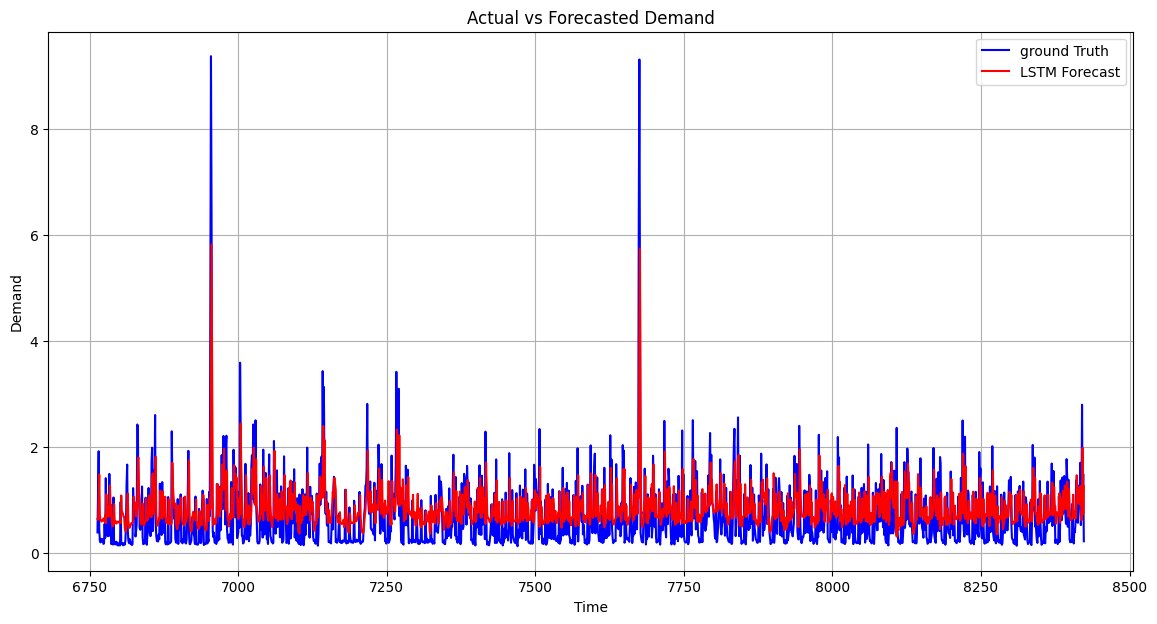

In [42]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

# 1. Vorhersagen für den Testdatensatz generieren
predictions = model.predict(X_test)

# 2. Die Vorhersagen in den ursprünglichen Bereich zurückskalieren (falls benötigt)
predictions_rescaled = scaler.inverse_transform(predictions)

# 3. Testdaten in den ursprünglichen Bereich zurückskalieren
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))


# 1. Berechne den Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test_rescaled, predictions_rescaled)

# 2. Ausgabe des MAE
print(f'Mean Absolute Error (MAE): {mae}')

# 4. Plotten der realen und vorhergesagten Werte
plt.figure(figsize=(14, 7))
plt.plot(test.index[24:], y_test_rescaled, label='ground Truth', color='blue')
plt.plot(test.index[24:], predictions_rescaled, label='LSTM Forecast', color='red')
plt.title('Actual vs Forecasted Demand')
plt.xlabel('Time')
plt.ylabel('Demand')
plt.legend()
plt.grid()
plt.show()


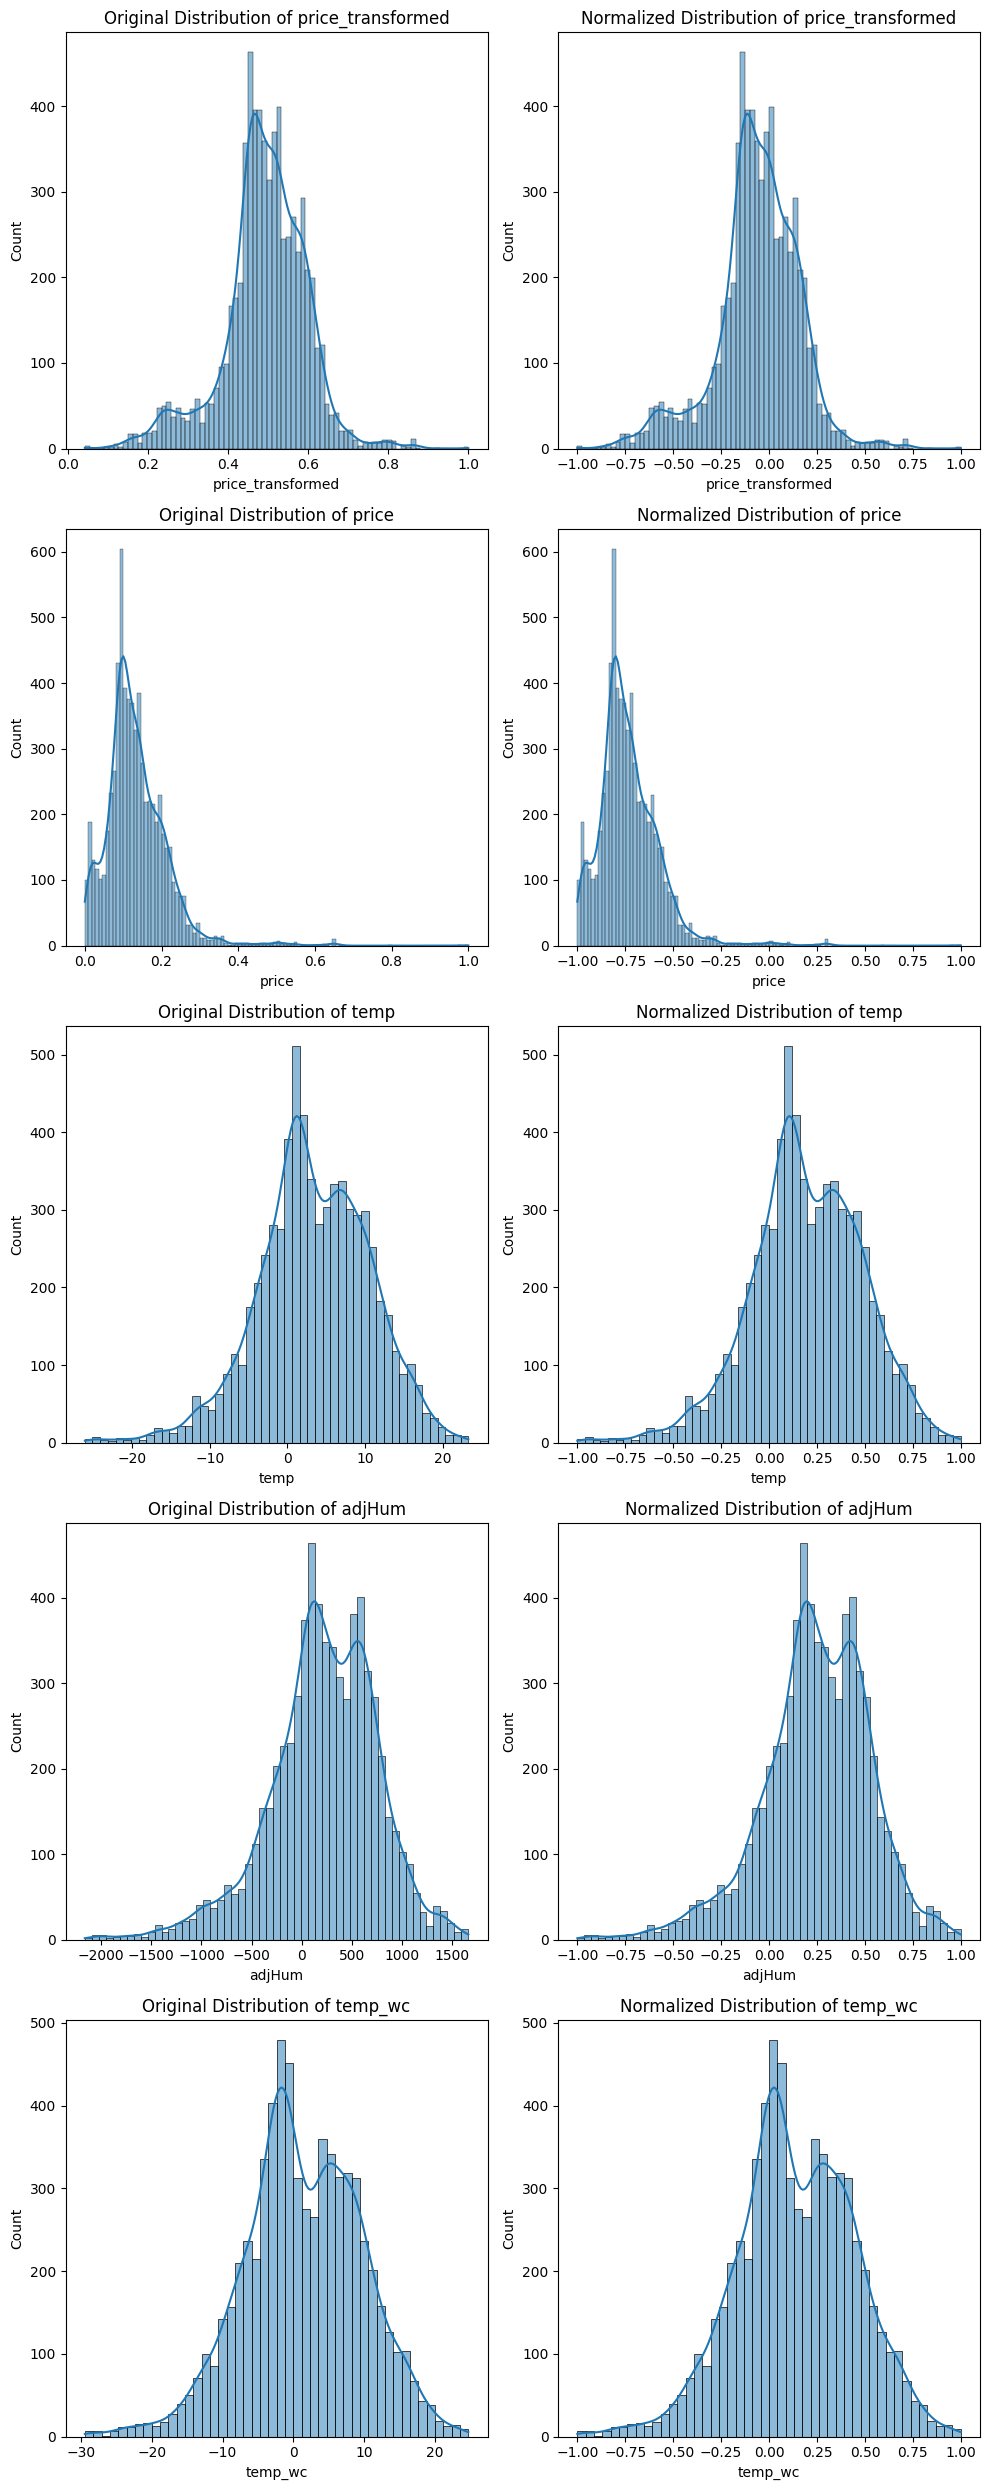

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler


selected_features = ['price_transformed', 'price', 'temp', 'adjHum', 'temp_wc']
# Split data into train and test sets
train_size = int(len(data) * 0.8)
train, test = data.iloc[:train_size], data.iloc[train_size:]

# Prepare inputs
train_y, test_y = train[target], test[target]
train_exog, test_exog = train[selected_features], test[selected_features]

# Apply MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1, 1))
train_exog_normalized = scaler.fit_transform(train_exog)

# Convert the normalized data back to a DataFrame for easier handling
train_exog_normalized_df = pd.DataFrame(train_exog_normalized, columns=selected_features)

# Plot the distribution of the features before and after normalization
fig, axes = plt.subplots(len(selected_features), 2, figsize=(10, len(selected_features) * 5))

# If axes is a 1D array, reshape it into a 2D array for consistent indexing
if len(selected_features) == 1:
    axes = axes.reshape(1, 2)

for i, feature in enumerate(selected_features):
    # Plot before normalization
    sns.histplot(train_exog[feature], kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f"Original Distribution of {feature}")
    
    # Plot after normalization
    sns.histplot(train_exog_normalized_df[feature], kde=True, ax=axes[i, 1])
    axes[i, 1].set_title(f"Normalized Distribution of {feature}")

plt.tight_layout()
plt.show()


In [44]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [45]:
# Load training and testing data
train_df = df # pd.read_csv("train.csv", parse_dates=["time"], index_col="time")
test_df = pd.read_csv("test.csv", parse_dates=["time"], index_col="time")

# Check the data
print(train_df.head())
print(test_df.head())

                 time  temp  dwpt  rhum   wdir  wspd  wpgt    pres    price  \
0 2021-08-31 21:00:00  11.2  10.3  94.0  320.0   7.2  16.7  1012.6  0.09016   
1 2021-08-31 22:00:00  10.7   9.6  93.0  320.0   7.2  13.0  1012.6  0.09251   
2 2021-08-31 23:00:00   9.9   9.0  94.0  320.0   7.2  13.0  1012.2  0.08890   
3 2021-09-01 00:00:00  10.0   8.4  90.0  330.0   7.2  13.0  1011.9  0.08735   
4 2021-09-01 01:00:00   9.0   8.1  94.0  300.0   3.6  13.0  1011.4  0.08688   

   demand  ... hour    temp_wc  adjHum  adjHum_sqrt_trans  \
0   0.577  ...   21  10.577897  1052.8          43.829214   
1   0.594  ...   22   9.995261   995.1          43.840620   
2   0.685  ...   23   9.063044   930.6          43.829214   
3   1.016  ...    0   9.179571   900.0          43.874822   
4   0.677  ...    1   9.137448   846.0          43.829214   

   adjHum_cubert_trans  adjHum_log_trans  rhum_transformed  price_transformed  \
0            12.431087          7.560601          1.912931           0.448406

In [46]:
test_df["temp_wc"] = 13.12 + 0.6215 * test_df["temp"] - 11.37 * (test_df["wspd"] ** 0.16) + 0.3965 * test_df["temp"] * (test_df["wspd"] ** 0.16)
test_df["adjHum"] = test_df["temp"] * test_df["rhum"]

In [47]:
last_day_train = train_df[-24:]["demand"]

naive_df = pd.concat([last_day_train, test_df["demand"]])
naive_forecast = naive_df.shift(24)
naive_forecast = naive_forecast[24:]
naive_forecast

2022-08-18 00:00:00+03:00    0.203
2022-08-18 01:00:00+03:00    0.239
2022-08-18 02:00:00+03:00    0.210
2022-08-18 03:00:00+03:00    0.220
2022-08-18 04:00:00+03:00    0.933
                             ...  
2022-08-24 19:00:00+03:00    0.379
2022-08-24 20:00:00+03:00    0.609
2022-08-24 21:00:00+03:00    1.572
2022-08-24 22:00:00+03:00    1.016
2022-08-24 23:00:00+03:00    0.243
Name: demand, Length: 168, dtype: float64

In [48]:
def rolling_forecast_sarima(train_data, test_data, horizon=24, window_size=168*2):  # Example: 168 hours = 1 week of data
    predictions = []
    train_data = train_data[-window_size:]  # Ensure initial training data has the correct window size
    
    for day in range(7):  # Forecasting for 7 days
        # Fit the ARIMA model on the current window
        model = SARIMAX(train_data, order=(1, 1, 1), seasonal_order=(1, 1, 0, 24))
        model_fit = model.fit(disp=False)
        
        # Forecast for the next 24 hours
        forecast = model_fit.forecast(steps=horizon)
        predictions.extend(forecast)
        
        # Update train_data with the latest observations and maintain the window size
        train_data = pd.concat([train_data[-(window_size - horizon):], test_data[:horizon]])
        test_data = test_data[horizon:]  # Move forward in the test set
    
    return predictions

In [49]:
def rolling_forecast_arima(train_data, test_data, horizon=24, window_size=168*2):  # 168 hours = 1 week of data
    predictions = []
    train_data = train_data[-window_size:]  # Ensure initial training data has the correct window size
    
    for day in range(7):  # Forecasting for 7 days (168 hours total)
        # Fit the ARIMA model on the current window
        model = ARIMA(train_data, order=(1, 1, 0))  # No seasonal_order, just ARIMA(p, d, q)
        model_fit = model.fit()
        
        # Forecast for the next 24 hours
        forecast = model_fit.forecast(steps=horizon)
        predictions.extend(forecast)
        
        # Update train_data with the latest observations and maintain the window size
        train_data = pd.concat([train_data[-(window_size - horizon):], test_data[:horizon]])
        test_data = test_data[horizon:]  # Move forward in the test set
    
    return predictions

In [50]:
def rolling_forecast_arimax(train_data, test_data, train_exog, test_exog, horizon=24, window_size=168*2):  # Example: 168 hours = 1 week of data
    predictions = []
    train_data = train_data[-window_size:]  # Ensure initial training data has the correct window size
    train_exog = train_exog[-window_size:] 

    scaler = StandardScaler()
    # Standardize exogenous features
    train_exog_scaled = scaler.fit_transform(train_exog)
    test_exog_scaled = scaler.transform(test_exog)

    # Sicherstellen, dass der Index bei train_exog und test_exog beibehalten wird
    train_exog_scaled = pd.DataFrame(scaler.fit_transform(train_exog), index=train_exog.index, columns=train_exog.columns)
    test_exog_scaled = pd.DataFrame(scaler.transform(test_exog), index=test_exog.index, columns=test_exog.columns)

    if not train_data.index.equals(train_exog_scaled.index):
        train_exog_scaled = train_exog_scaled.reindex(train_data.index)


    for day in range(7):  # Forecasting for 7 days
        # Fit the ARIMA model on the current window
        p, d, q = 1, 1, 0  # Adjust based on previous analysis
        arimax_model = ARIMA(train_data, order=(p, d, q), exog=train_exog_scaled)
        arimax_fit = arimax_model.fit()
        
        # Forecast for the next 24 hours
        forecast_arimax = arimax_fit.predict(start=len(train_data), end=len(train_data) + horizon - 1, exog=test_exog_scaled[:horizon])
        predictions.extend(forecast_arimax)
        
        # Update train_data with the latest observations and maintain the window size
        train_data = pd.concat([train_data[-(window_size - horizon):], test_data[:horizon]])
        #train_exog_scaled = pd.concat([train_exog_scaled[-(window_size - horizon):], test_exog_scaled[:horizon]])
        train_exog_scaled = pd.concat([pd.DataFrame(train_exog_scaled[-(window_size - horizon):]), pd.DataFrame(test_exog_scaled[:horizon])]) #, ignore_index=True)

        # if not train_data.index.equals(train_exog_scaled.index):
        #     train_exog_scaled = train_exog_scaled.reindex(train_data.index)

        test_data = test_data[horizon:]  # Move forward in the test set
        test_exog_scaled = test_exog_scaled[horizon:]  # Move forward in the test set
    
    return predictions

In [51]:
# Assume demand is the target and additional features are included in the dataset
target = "demand"
exogenous_features = ["temp_wc"]

# Train-test split for the rolling setup
train_data = train_df[target]
test_data = test_df[target]

train_exog = train_df[exogenous_features]
test_exog = test_df[exogenous_features]

In [52]:
train_data = train_data.to_frame()

In [53]:
# Forecast
arima_forecast = rolling_forecast_arima(train_data, test_data)
sarima_forecast = rolling_forecast_sarima(train_data, test_data)
arimax_forecast = rolling_forecast_arimax(train_data, test_data, train_exog, test_exog)


/anaconda/envs/azureml_py38_PT_TF/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/anaconda/envs/azureml_py38_PT_TF/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/anaconda/envs/azureml_py38_PT_TF/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/anaconda/envs/azureml_py38_PT_TF/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_

In [54]:
# Actual values for the 7-day horizon
actuals = test_data[:24 * 7]


# Calculate MAE
arima_mae = mean_absolute_error(actuals, arima_forecast)
sarima_mae = mean_absolute_error(actuals, sarima_forecast)
arimax_mae = mean_absolute_error(actuals, arimax_forecast)
naive_mae = mean_absolute_error(actuals, naive_forecast)  # Exclude the first value due to NaN after shifting

print(f"ARIMA MAE: {arima_mae:.3f}")
print(f"SARIMA MAE: {sarima_mae:.3f}")
print(f"ARIMAX MAE: {arimax_mae:.3f}")
print(f"Seasonal Naïve Forecast MAE: {naive_mae:.3f}")


ARIMA MAE: 0.408
SARIMA MAE: 0.387
ARIMAX MAE: 0.378
Seasonal Naïve Forecast MAE: 0.413


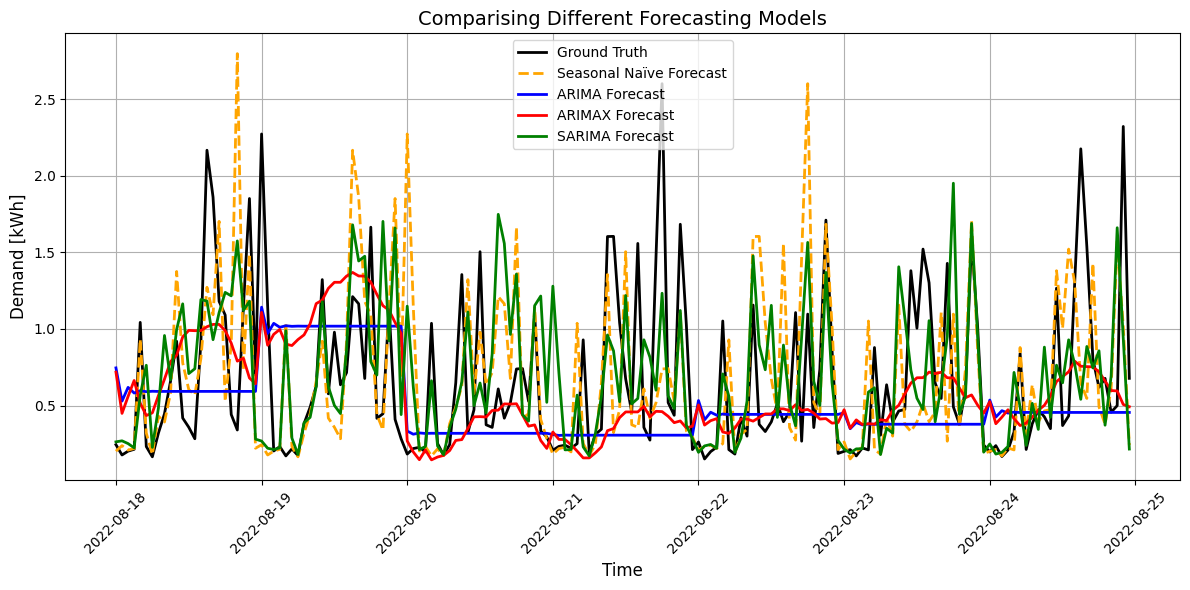

In [55]:
actuals = test_data[:24*7]
# Plot actuals, ARIMA forecast, and Naïve forecast
plt.figure(figsize=(12, 6))

# Plot actual values (demand) from 'actuals' DataFrame
plt.plot(actuals.index, actuals.values, label='Ground Truth', color='black', linewidth=2)

# Plot Naïve forecast
plt.plot(actuals.index, naive_forecast, label='Seasonal Naïve Forecast', color='orange', linestyle='--', linewidth=2)

# # Plot ARIMA forecasted values
plt.plot(actuals.index, arima_forecast, label='ARIMA Forecast', color='blue', linewidth=2)

# # Plot ARIMAX forecasted values
plt.plot(actuals.index, arimax_forecast, label='ARIMAX Forecast', color='red', linewidth=2)

# # Plot SARIMA forecasted values
plt.plot(actuals.index, sarima_forecast, label='SARIMA Forecast', color='green', linestyle='-', linewidth=2)


# Add title and labels
plt.title('Comparising Different Forecasting Models', fontsize=14)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Demand [kWh]', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add legend
plt.legend()

# Show plot
plt.grid(True)
plt.tight_layout()  # Adjust layout to avoid label cut-offs
plt.show()
